# Convolutional Neural Networks in PyTorch
> We introduce convolutional neural networks, learning how to train them and how to use them to make predictions. This is the Summary of lecture "Introduction to Deep Learning with PyTorch", via datacamp.



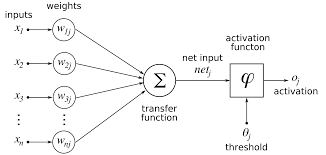

The structure of an artificial neuron


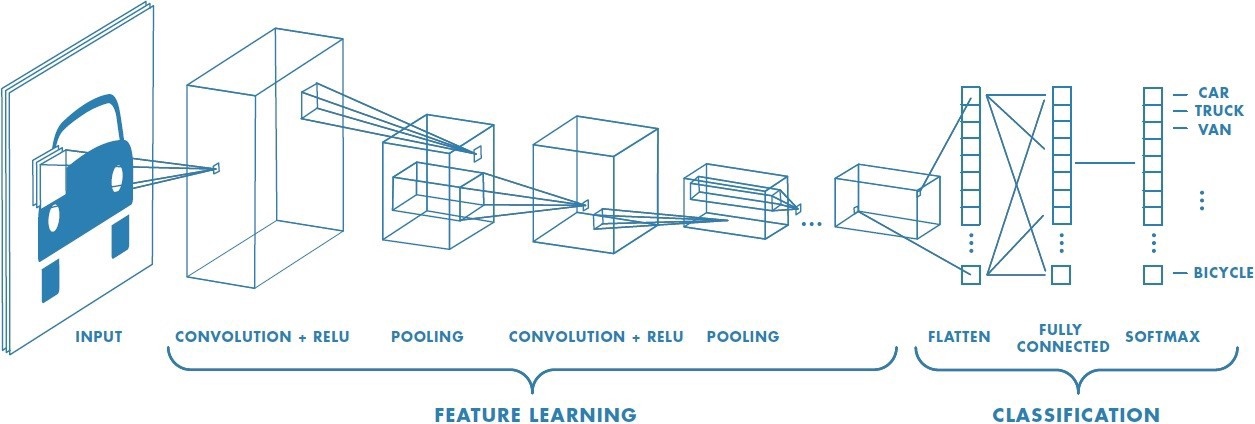
Structure of a CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

#Convolution Layer

*   An image matrix (volume) of dimension (h ∗ w ∗ d)
*  A filter (fh ∗ fw ∗ d)
* Output a volume dimension (h − fh + 1) ∗ (w − fw + 1) ∗ 1
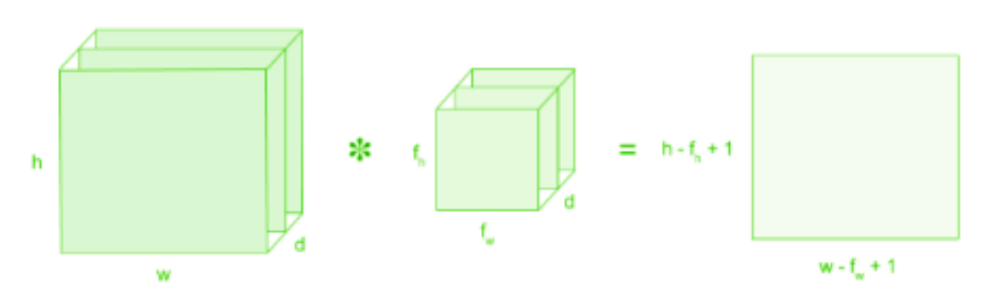

 Illustration of inputs and outputs of the convolution layer

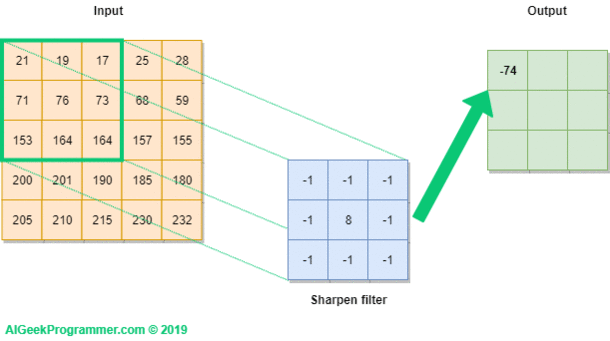

## Convolution operator
- Problems with the Fully-connected nn
    - Do you need to consider all the relations between the features?
    - Fully connected nn are big and so very computationally inefficient
    - They have so many parameters, and so overfit
- Main idea of CNN
    - Units are connected with only a few units from the previous layer
    - Units share weights
![convolution](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/convolutions.png?raw=1)
- Convolving operation
![convolution2](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/convolution2.png?raw=1)
- Activation map
![act](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/act_map.png?raw=1)

### Convolution operator - OOP way


In [ ]:
# Create 10 random images of shape (1, 28, 28)
images = torch.rand(10, 1, 28, 28)

# Build 6 conv. filters
conv_filters = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, padding=1)

# Convolve the image with the filters
output_feature = conv_filters(images)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


### Convolution operator - Functional way
While I and most of PyTorch practitioners love the `torch.nn` package (OOP way), other practitioners prefer building neural network models in a more functional way, using `torch.nn.functional`. More importantly, it is possible to mix the concepts and use both libraries at the same time (we have already done it in the previous chapter). You are going to build the same neural network you built in the previous exercise, but this time using the functional way.

In [ ]:
# Create 10 random images
images = torch.rand(10, 1, 28, 28)

# Create 6 filters
filters = torch.rand(6, 1, 3, 3)

# Convolve the image with the filters
output_feature = F.conv2d(images, filters, stride=1, padding=1)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


# Stride
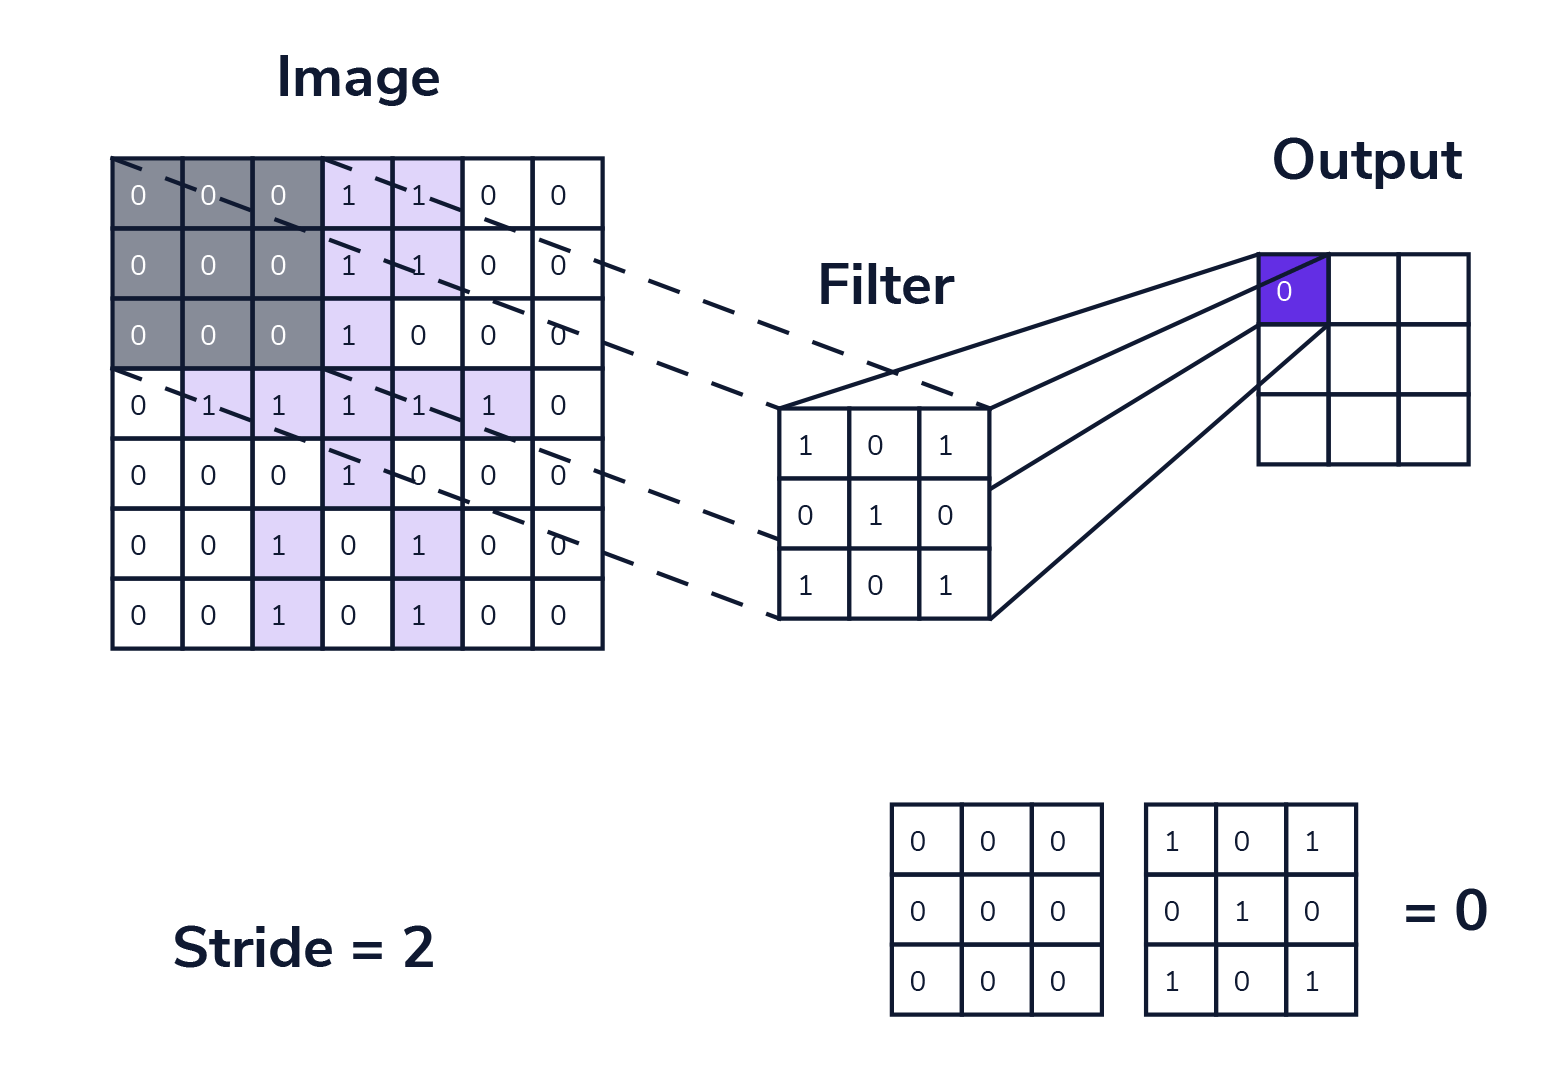

# Padding
Type of Padding:


*   Valid Padding
*   Same Padding


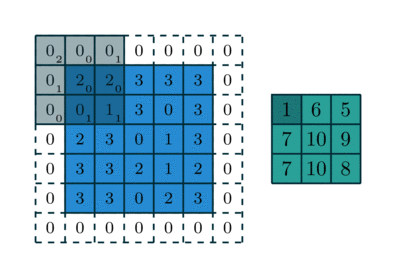

### Pooling operators
- For feature selection,
![pooling](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/pooling.png?raw=1)
- Max-Pooling
![maxpool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/maxpool.png?raw=1)
- Average-Pooling
![avgpool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/avgpool.png?raw=1)

### Max-pooling operator
Here you are going to practice using max-pooling in both OOP and functional way, and see for yourself that the produced results are the same.

In [ ]:
im = torch.rand(1, 1, 6, 6)
im

tensor([[[[0.3719, 0.5626, 0.0467, 0.5783, 0.0541, 0.5374],
          [0.0660, 0.8718, 0.4926, 0.1291, 0.3391, 0.9095],
          [0.5611, 0.2622, 0.2592, 0.3187, 0.6624, 0.9951],
          [0.8349, 0.6743, 0.9794, 0.6889, 0.0306, 0.4627],
          [0.4803, 0.0634, 0.7857, 0.5005, 0.7090, 0.6187],
          [0.8773, 0.8505, 0.9799, 0.3615, 0.1887, 0.3500]]]])

In [ ]:
# Build a pooling operator with size 2
max_pooling = nn.MaxPool2d(2)

# Apply the pooling operator
output_feature = max_pooling(im)

# Use pooling operator in the image
output_feature_F = F.max_pool2d(im, 2)

# Print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[0.8718, 0.5783, 0.9095],
          [0.8349, 0.9794, 0.9951],
          [0.8773, 0.9799, 0.7090]]]])
tensor([[[[0.8718, 0.5783, 0.9095],
          [0.8349, 0.9794, 0.9951],
          [0.8773, 0.9799, 0.7090]]]])


### Average-pooling operator
After coding the max-pooling operator, you are now going to code the average-pooling operator. You just need to replace max-pooling with average pooling.



In [ ]:
# Build a pooling operator with size 2
avg_pooling = nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(im)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im, 2)

# Print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[0.4681, 0.3117, 0.4601],
          [0.5831, 0.5615, 0.5377],
          [0.5679, 0.6569, 0.4666]]]])
tensor([[[[0.4681, 0.3117, 0.4601],
          [0.5831, 0.5615, 0.5377],
          [0.5679, 0.6569, 0.4666]]]])


#Global Max Pooling
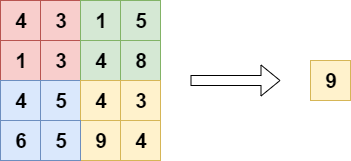

#Global Average Pooling
#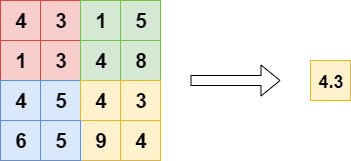

#Fully Connected Layer
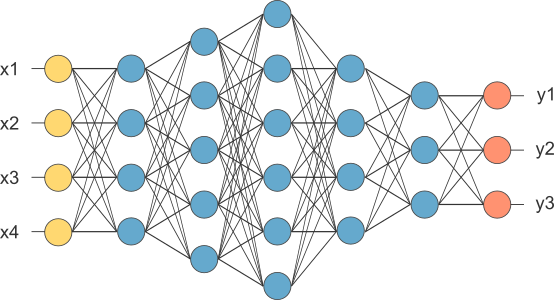

--------

## Convolutional Neural Networks
- AlexNet
![alexnet](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/alexnet.png?raw=1)
- Implementation in pytorch
```python
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = self.maxpool(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)
```

### Your first CNN - __init__ method
You are going to build your first convolutional neural network. You're going to use the MNIST dataset as the dataset, which is made of handwritten digits from 0 to 9. The convolutional neural network is going to have 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer. Remember that each pooling layer halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes. MNIST images have shape (1, 28, 28)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        self.fc = nn.Linear(49 * 10, 10)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

## Training Convolutional Neural Networks


### Training CNNs
Similarly to what you did in Chapter 2, you are going to train a neural network. This time however, you will train the CNN you built in the previous lesson, instead of a fully connected network. The packages you need have been imported for you and the network (called `net`) instantiated. The cross-entropy loss function (called `criterion`) and the Adam optimizer (called `optimizer`) are also available. We have subsampled the training set so that the training goes faster, and you are going to use a single epoch.



In [ ]:
import torchvision.transforms as transforms

# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081))
])

# Preparing the training and test set
trainset = torchvision.datasets.MNIST('mnist', train=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, transform=transform)

# Prepare loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)

In [ ]:
import torch.optim as optim

net = Net()
optimizer = optim.Adam(net.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

In [ ]:
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()

    # Compute the forward pass
    outputs = net(inputs)

    # Compute the loss function
    loss = criterion(outputs, labels)

    # Compute the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

### Using CNNs to make predictions
Building and training neural networks is a very exciting job (trust me, I do it every day)! However, the main utility of neural networks is to make predictions. This is the entire reason why the field of deep learning has bloomed in the last few years, as neural networks predictions are extremely accurate. On this exercise, we are going to use the convolutional neural network you already trained in order to make predictions on the MNIST dataset.

Remember that `torch.max()` takes two arguments: -`output.data` - the tensor which contains the data.

Either 1 to do argmax or 0 to do max.

In [ ]:
net.eval()
# Iterate over the data in the test_loader
for i, data in enumerate(test_loader):
    # Get the image and label from data
    image, label = data

    # Make a forward pass in the net with your image
    output = net(image)

    # Argmax the results of the net
    _, predicted = torch.max(output.data, 1)

    if predicted == label:
        print("Yipes, your net made the right prediction " + str(predicted))
    else:
        print("Your net prediction was " + str(predicted) + ", but the correct label is: " + str(label))

    if i > 10:
        break

Yipes, your net made the right prediction tensor([7])
Yipes, your net made the right prediction tensor([2])
Yipes, your net made the right prediction tensor([1])
Yipes, your net made the right prediction tensor([0])
Yipes, your net made the right prediction tensor([4])
Yipes, your net made the right prediction tensor([1])
Yipes, your net made the right prediction tensor([4])
Yipes, your net made the right prediction tensor([9])
Yipes, your net made the right prediction tensor([5])
Yipes, your net made the right prediction tensor([9])
Yipes, your net made the right prediction tensor([0])
Yipes, your net made the right prediction tensor([6])


#Implementation of CNN using MNIST Dataset

#About

In [ ]:
## import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

##Import The Data

In [ ]:
%%capture
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

#Exploring the Data

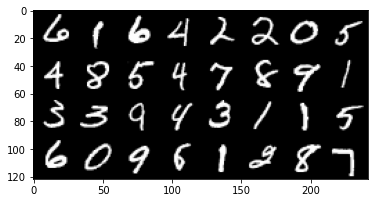

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

#The Model

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

#Training the Model

In [ ]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## compute accuracy

In [ ]:
## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

##Start of Epoch Loop

In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)

    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i))

Epoch: 0 | Loss: 1.5831 | Train Accuracy: 88.24
Epoch: 1 | Loss: 1.4956 | Train Accuracy: 96.91
Epoch: 2 | Loss: 1.4834 | Train Accuracy: 98.03
Epoch: 3 | Loss: 1.4784 | Train Accuracy: 98.52
Epoch: 4 | Loss: 1.4751 | Train Accuracy: 98.81


In [ ]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 98.36


#Loss Function
Loss Function is a method of evaluating how well your algorithm is modelling your dataset.

#Why is a Loss Function Used?
Loss functions are used to guide the learning process of a machine learning model.



#Types of Loss Function:
# 1. Mean Absolute Error (MAE) Loss:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Example code

In [ ]:
y_true = torch.tensor([3.0, -0.5, 2.0, 7.0])
y_pred = torch.tensor([2.5, 0.0, 2.1, 7.8])

mse_loss = nn.MSELoss()
loss = mse_loss(y_pred, y_true)
print("MSE Loss:", loss.item())

MSE Loss: 0.2875000834465027


 # 2. Mean Absolute Error (MAE) Loss

 $$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [ ]:
mae_loss = nn.L1Loss()
loss = mae_loss(y_pred, y_true)
print("MAE Loss:", loss.item())

MAE Loss: 0.4750000238418579


# 3. Huber Loss (Smooth L1 Loss)
$$
L_{\delta}(a) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| < \delta \\\\
\delta \cdot (|y - \hat{y}| - \frac{1}{2} \delta) & \text{otherwise}
\end{cases}
$$

In [ ]:
huber_loss = nn.SmoothL1Loss()
loss = huber_loss(y_pred, y_true)
print("Huber Loss:", loss.item())

Huber Loss: 0.14375004172325134


 #4. Binary Cross Entropy (BCE) Loss
 $$
\text{BCE} = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

In [ ]:
y_true = torch.tensor([1.0, 0.0, 1.0])
y_pred = torch.tensor([0.9, 0.1, 0.8])  # Must be between 0 and 1

bce_loss = nn.BCELoss()
loss = bce_loss(y_pred, y_true)
print("Binary Cross Entropy Loss:", loss.item())

Binary Cross Entropy Loss: 0.14462153613567352


#5. Categorical Cross Entropy (CCE) Loss
$$
\text{CCE} = - \sum_{c=1}^{C} y_c \cdot \log(\hat{y}_c)
$$

In [ ]:
# Each row is the raw logits for one sample (3 classes)
logits = torch.tensor([[2.0, 1.0, 0.1],
                       [0.1, 2.5, 0.3],
                       [1.2, 0.7, 3.1]])

# True class labels for 3 samples
labels = torch.tensor([0, 1, 2])

cce_loss = nn.CrossEntropyLoss()
loss = cce_loss(logits, labels)
print("Categorical Cross Entropy Loss:", loss.item())

Categorical Cross Entropy Loss: 0.2719869017601013


# Batch Size
In deep learning, batch size refers to the number of training examples processed before the model updates its weights. The choice of batch size significantly affects training speed, accuracy, and memory usage
There are 3 main types based on how the batch size is set:

#1. Stochastic Gradient Descent (SGD)
Batch Size = 1


In [ ]:
from torch.utils.data import DataLoader
trainloader_sgd = DataLoader(trainset, batch_size=1, shuffle=True)

for data in trainloader_sgd:
    inputs, labels = data
    # Forward, backward, optimizer step here


# 2. Mini-Batch Gradient Descent
Batch Size = 16, 32, 64, 128, etc.

In [ ]:
trainloader_mini = DataLoader(trainset, batch_size=32, shuffle=True)

for data in trainloader_mini:
    inputs, labels = data
    # Forward, backward, optimizer step here

#3. Batch Gradient Descent (Full Batch)
Batch Size = Entire Dataset

In [ ]:
# Set batch size equal to full dataset size
full_batch_size = len(trainset)
trainloader_full = DataLoader(trainset, batch_size=full_batch_size, shuffle=False)

for data in trainloader_full:
    inputs, labels = data
    # Forward, backward, optimizer step here